# SpotRM API with Python: retrieving results with image

BSD 3-Clause License<br>
Copyright (c) 2020, Awametox AB<br>
You should have received a copy of the BSD 3-Clause License
along with this script; <br>
if not, see <https://github.com/Awamegit/SpotRM_API_examples/blob/master/LICENSE>


In [ ]:
!pip install requests python-dotenv
import datetime
import json
import os

import requests
from dotenv import load_dotenv
from requests.auth import HTTPBasicAuth

from IPython.display import SVG, display  # for jupyter notebook

In [10]:
#
#  Start by defining the server, the access credentials and a few convenience shortcuts.
#
BASEURL = "https://www.spotrm.com/api/v1"
# Read the your SpotRM username / password from the environment using the dotenv library
load_dotenv()
authData = HTTPBasicAuth(os.environ["USER"], os.environ["PASSWORD"])
headers = {"content-type": "application/json"}

Example of getting and using an authorisation access token rather than sending
one's credentials with every request.

Here using a smiles string based search

In [11]:
def get_image(smiles:str, smarts_id: int):
    """
    Function to retrieve an image highlighting the region in a query structure
    provided as a smiles string which triggers a particular reactive metabolite
    alert specified by its smarts id.

    Relevant smarts_id would be identified by an earlier search using the
    /api/v1/search/smarts/smiles route.

    Outputs an SVG image file smilesImage_<date>.svg
    """

    url = BASEURL + "/get/image/smiles"
    query = {"smiles": smiles, "smarts_id": smarts_id}
    fileOutput = "smilesImage_" + str(datetime.datetime.now().date()) + ".svg"
    # change path as needed

    response = requests.post(
        url, data=json.dumps(query), headers=headers, auth=authData
    )
    if response.status_code == 200:
        with open(fileOutput, "wb") as f:
            f.write(response.content)
        display(SVG(filename=fileOutput))
        print(f"SVG image saved as {fileOutput}")
    else:
        print("There was an error: " + json.loads(response.text)["message"])

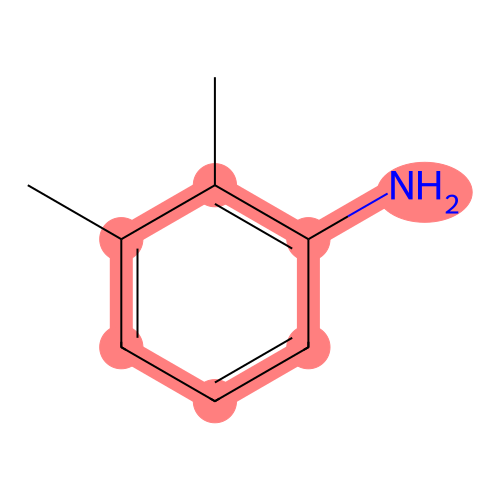

SVG image saved as smilesImage_2024-09-21.svg


In [12]:
get_image("c1ccc(C)c(C)c1N", 1)